In [3]:
import json
import matplotlib
import pandas as pd
import torch

In [4]:
files = {
    "route_data" : "route_data.json",
    "package_data" : "package_data.json",
    "travel_times" : "travel_times.json", # large file ~1.8GB
    "actual_sequences" : "actual_sequences.json",
    "invalid_sequence_scores" : "invalid_sequence_scores.json",
}

data_dir = "../data/model_build_inputs/"

# Route Data

In [5]:
data = json.load(open(data_dir + files['route_data'], "r"))
df = pd.DataFrame.from_dict(data, orient="index")

In [6]:
"""
Dataframe Fomat (6112 rows)

RouteID <string> : {
    station_code <string>;
    date_YYYY_MM_DD <string>; 
    departure_time_utc <string>;
    executor_capacity_cm3 <'numpy.float64'>;
    route_score <'High'|'Medium'|'Low'>
    stops : {
        StopID <string> : {
            'lng' <'numpy.float64'>;
            'type' <'Dropoff' | 'Station'>;
            'zone_id' <string | nan>
        }
    }
}

"""
 
df

,station_code,date_YYYY_MM_DD,departure_time_utc,executor_capacity_cm3,route_score,stops
RouteID_00143bdd-0a6b-49ec-bb35-36593d303e77,DLA3,2018-07-27,16:02:10,3313071.0,High,"{'AD': {'lat': 34.099611, 'lng': -118.283062, ..."
RouteID_0016bc70-cb8d-48b0-aa55-8ee50bdcdb59,DSE4,2018-07-28,15:44:41,4247527.0,High,"{'AC': {'lat': 47.689446, 'lng': -122.296071, ..."
RouteID_001948e9-4675-486d-9ec5-912fd8e0770f,DSE5,2018-08-18,15:32:04,4247527.0,High,"{'AA': {'lat': 47.268001, 'lng': -122.5079, 't..."
RouteID_001b4ee3-c4f2-467f-932b-c85524d1021f,DLA9,2018-08-15,15:09:38,3313071.0,High,"{'AB': {'lat': 33.823076, 'lng': -118.058727, ..."
RouteID_0021a2aa-780f-460d-b09a-f301709e2523,DLA7,2018-08-05,14:23:26,3313071.0,High,"{'AA': {'lat': 33.84364, 'lng': -117.773651, '..."
...,...,...,...,...,...,...
RouteID_ffd16e94-e3db-435f-a128-1ddcb2a34e54,DAU1,2018-07-24,13:47:59,4247527.0,Medium,"{'AA': {'lat': 30.292536, 'lng': -97.745191, '..."
RouteID_ffe98097-93df-44b0-9c45-4fedbafae3f3,DCH4,2018-08-10,14:07:25,3313071.0,Medium,"{'AC': {'lat': 42.187711, 'lng': -88.262079, '..."
RouteID_ffebb6fc-ce81-46db-b2a1-2750c0333185,DCH3,2018-07-25,14:10:26,3313071.0,High,"{'AA': {'lat': 41.858479, 'lng': -88.322974, '..."
RouteID_fff2548c-1069-4340-8e50-08420efe435d,DLA8,2018-07-29,15:13:39,4247527.0,High,"{'AQ': {'lat': 34.065987, 'lng': -118.363671, ..."


In [7]:
print("Possible vechilcle sizes:", df['executor_capacity_cm3'].unique())
print("Possible route scores:", df['route_score'].unique())

Possible vechilcle sizes: [3313071.   4247527.   3114853.25]
Possible route scores: ['High' 'Medium' 'Low']


In [8]:
print(df['stops'][0]["VE"]) # {'lat': 34.007369, 'lng': -118.143927, 'type': 'Station', 'zone_id': nan}
print(df['stops'][0]["AD"]) # {'lat': 34.099611, 'lng': -118.283062, 'type': 'Dropoff', 'zone_id': 'P-12.3C'}

{'lat': 34.007369, 'lng': -118.143927, 'type': 'Station', 'zone_id': nan}
{'lat': 34.099611, 'lng': -118.283062, 'type': 'Dropoff', 'zone_id': 'P-12.3C'}


In [20]:
df.loc['RouteID_0016bc70-cb8d-48b0-aa55-8ee50bdcdb59']['stops'] # a dict, equiv to df['stops'][0]

{'AC': {'lat': 47.689446,
  'lng': -122.296071,
  'type': 'Dropoff',
  'zone_id': 'D-2.2A'},
 'AE': {'lat': 47.683039,
  'lng': -122.292498,
  'type': 'Dropoff',
  'zone_id': 'D-2.1A'},
 'AG': {'lat': 47.676683,
  'lng': -122.30768,
  'type': 'Dropoff',
  'zone_id': 'D-2.3C'},
 'AN': {'lat': 47.673579,
  'lng': -122.3065,
  'type': 'Dropoff',
  'zone_id': 'D-2.3C'},
 'AS': {'lat': 47.678486,
  'lng': -122.303892,
  'type': 'Dropoff',
  'zone_id': 'D-2.1B'},
 'BA': {'lat': 47.684871,
  'lng': -122.297748,
  'type': 'Dropoff',
  'zone_id': 'D-2.3A'},
 'BF': {'lat': 47.677761,
  'lng': -122.297395,
  'type': 'Dropoff',
  'zone_id': 'D-2.3A'},
 'BJ': {'lat': 47.680784,
  'lng': -122.304998,
  'type': 'Dropoff',
  'zone_id': 'D-2.1B'},
 'BP': {'lat': 47.683784,
  'lng': -122.290503,
  'type': 'Dropoff',
  'zone_id': 'D-3.2A'},
 'BV': {'lat': 47.680504,
  'lng': -122.302865,
  'type': 'Dropoff',
  'zone_id': 'D-2.1B'},
 'BY': {'lat': 47.685477,
  'lng': -122.295931,
  'type': 'Dropoff',
  'z

### Average number of stops

count    6112.000000
mean      147.991983
std        31.033653
min        33.000000
25%       129.000000
50%       151.000000
75%       170.000000
max       238.000000
dtype: float64


<AxesSubplot:>

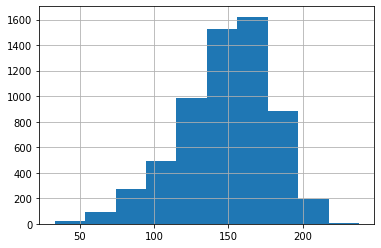

In [14]:
stops_count = pd.Series([len(stops) for stops in df.stops])
print(stops_count.describe())
stops_count.hist()

# Package Data

In [15]:
data = json.load(open(data_dir + files['package_data'], "r"))
package_df = pd.DataFrame.from_dict(data, orient="index")

In [16]:
"""
Dataframe Fomat (6112 rows)

RouteID <string> : {
    station_code <string>;
    date_YYYY_MM_DD <string>; 
    departure_time_utc <string>;
    executor_capacity_cm3 <'numpy.float64'>;
    route_score <'High'|'Medium'|'Low'>
    stops : {
        StopID <string> : {
            'lng' <'numpy.float64'>;
            'type' <'Dropoff' | 'Station'>;
            'zone_id' <string | nan>
        }
    }
}

"""
 
package_df

,AD,AF,AG,BA,BE,BG,BP,BT,BY,BZ,...,GG,PH,EN,QN,SG,SX,SU,UK,VK,BN
RouteID_00143bdd-0a6b-49ec-bb35-36593d303e77,{'PackageID_9d7fdd03-f2cf-4c6f-9128-028258fc09...,{'PackageID_15c6a204-ec5f-4ced-9c3d-472316cc77...,{'PackageID_3b28f781-242e-416e-9575-84c7188b82...,{'PackageID_a18e36e0-6b5a-45b7-bf7a-7c3a15bd5a...,{'PackageID_22c8f630-8ab9-40d5-a36d-38ef01761b...,{'PackageID_0934f8ee-81f4-4084-b54f-5fe3e6c64b...,{'PackageID_c734cbd5-768c-4c20-81df-f366c77627...,{'PackageID_a595f722-d466-4981-a14e-3c5d30cbd2...,{'PackageID_cb9b6e35-82f9-4d8e-a0a2-20c0407bf7...,{'PackageID_6218c8a5-6ee8-4040-994f-a626b75651...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
RouteID_001948e9-4675-486d-9ec5-912fd8e0770f,{'PackageID_de2b05b8-2186-47b2-b0f1-640cd01b65...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
RouteID_00575a14-7d19-4291-8853-8f7095ed1bc6,{'PackageID_2567ffe2-6172-4730-951f-4eeb477dc7...,NaN,{'PackageID_516e130d-177c-4323-a25e-d00b61b3ce...,NaN,NaN,NaN,NaN,NaN,NaN,{'PackageID_39b68332-c9f8-490c-8a8a-e4794c47fe...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
RouteID_0076d53c-6bfa-4e22-b39e-08769fb8e4d3,{'PackageID_fa735ece-c0c7-4e1c-83a5-54a0487965...,{'PackageID_920a48c1-4362-4d95-ada3-04b3025f59...,{'PackageID_7e657717-d1c8-4466-bd1d-c36e71938f...,NaN,{'PackageID_4e4fc91d-7ab7-4896-8131-53a935faf1...,{'PackageID_26c8b078-d42b-43ee-8cb4-1e318599ea...,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
RouteID_007b8544-11dc-47b2-be61-0095f8f2af71,{'PackageID_6a5cb75e-f55a-4c75-a711-6458d5e17d...,{'PackageID_3a9d9194-2d79-4ecc-a1c9-a55fc300db...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,{'PackageID_7a3090ae-2449-4db0-8dd6-f243d1f13e...,{'PackageID_1e73909e-8685-4ddb-8de6-9552bfab6d...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
RouteID_4ba0d71d-b87a-4bad-81a8-e4645e118ca4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,{'PackageID_10c78d1b-ddc2-447f-894d-9e8d39ed3c...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
RouteID_522f582f-040b-45c7-90a1-7ff84787d5b5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,{'PackageID_3a077b56-2f8c-4f15-9fd4-1f3baeff40...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
RouteID_ab9e4142-7a2b-412c-8a81-30ea547568c3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
RouteID_64cb7ba5-342d-46db-9e04-962248c6f667,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [19]:
package_df.loc['RouteID_00143bdd-0a6b-49ec-bb35-36593d303e77']["AD"]

{'PackageID_9d7fdd03-f2cf-4c6f-9128-028258fc09ea': {'scan_status': 'DELIVERED',
  'time_window': {'start_time_utc': nan, 'end_time_utc': nan},
  'planned_service_time_seconds': 59.3,
  'dimensions': {'depth_cm': 25.4, 'height_cm': 7.6, 'width_cm': 17.8}},
 'PackageID_5541e679-b7bd-4992-b288-e862f6c84ae7': {'scan_status': 'DELIVERED',
  'time_window': {'start_time_utc': '2018-07-27 16:00:00',
   'end_time_utc': '2018-07-28 00:00:00'},
  'planned_service_time_seconds': 59.3,
  'dimensions': {'depth_cm': 25.4, 'height_cm': 12.7, 'width_cm': 17.8}},
 'PackageID_84d0295b-1adb-4a33-a65e-f7d6247c7a07': {'scan_status': 'DELIVERED',
  'time_window': {'start_time_utc': nan, 'end_time_utc': nan},
  'planned_service_time_seconds': 59.3,
  'dimensions': {'depth_cm': 39.4, 'height_cm': 7.6, 'width_cm': 31.8}}}

In [22]:
x = {"AC": 36, "AE": 28, "AG": 104, "AN": 94, "AS": 79, "BA": 44, "BF": 51, "BJ": 73, "BP": 1, "BV": 74, "BY": 39, "CB": 88, "CG": 47, "CH": 80, "CO": 71, "DF": 60, "DG": 99, "DH": 6, "DI": 66, "DQ": 12, "DR": 7, "EH": 57, "EJ": 45, "ER": 41, "FL": 98, "FM": 2, "GC": 105, "GI": 84, "GN": 64, "GR": 17, "HC": 5, "HG": 43, "HN": 100, "HR": 101, "HY": 18, "HZ": 55, "IB": 20, "KC": 87, "KI": 32, "KK": 63, "LD": 50, "LI": 10, "MC": 9, "MV": 30, "NB": 83, "NC": 58, "NM": 53, "NO": 26, "NQ": 19, "NW": 13, "NZ": 90, "OB": 72, "OC": 89, "OF": 102, "ON": 22, "OZ": 77, "PC": 40, "PF": 69, "PG": 8, "PQ": 15, "PV": 34, "QA": 46, "QC": 67, "QQ": 93, "QS": 61, "QU": 48, "RC": 23, "RM": 78, "RR": 95, "RZ": 52, "SA": 21, "SC": 85, "SK": 14, "TA": 97, "TM": 35, "TN": 29, "TX": 27, "UH": 11, "UJ": 25, "UR": 96, "UW": 16, "UX": 0, "VJ": 24, "VU": 56, "VX": 37, "WD": 3, "WN": 103, "WP": 59, "WW": 82, "WX": 33, "XD": 91, "XE": 86, "XM": 70, "XT": 38, "XV": 49, "XX": 31, "XZ": 62, "YB": 92, "YJ": 42, "YK": 4, "YM": 75, "YX": 81, "ZF": 68, "ZL": 76, "ZS": 65, "ZV": 54}

In [23]:
dict(sorted(x.items(), key=lambda item: item[1]))

{'UX': 0,
 'BP': 1,
 'FM': 2,
 'WD': 3,
 'YK': 4,
 'HC': 5,
 'DH': 6,
 'DR': 7,
 'PG': 8,
 'MC': 9,
 'LI': 10,
 'UH': 11,
 'DQ': 12,
 'NW': 13,
 'SK': 14,
 'PQ': 15,
 'UW': 16,
 'GR': 17,
 'HY': 18,
 'NQ': 19,
 'IB': 20,
 'SA': 21,
 'ON': 22,
 'RC': 23,
 'VJ': 24,
 'UJ': 25,
 'NO': 26,
 'TX': 27,
 'AE': 28,
 'TN': 29,
 'MV': 30,
 'XX': 31,
 'KI': 32,
 'WX': 33,
 'PV': 34,
 'TM': 35,
 'AC': 36,
 'VX': 37,
 'XT': 38,
 'BY': 39,
 'PC': 40,
 'ER': 41,
 'YJ': 42,
 'HG': 43,
 'BA': 44,
 'EJ': 45,
 'QA': 46,
 'CG': 47,
 'QU': 48,
 'XV': 49,
 'LD': 50,
 'BF': 51,
 'RZ': 52,
 'NM': 53,
 'ZV': 54,
 'HZ': 55,
 'VU': 56,
 'EH': 57,
 'NC': 58,
 'WP': 59,
 'DF': 60,
 'QS': 61,
 'XZ': 62,
 'KK': 63,
 'GN': 64,
 'ZS': 65,
 'DI': 66,
 'QC': 67,
 'ZF': 68,
 'PF': 69,
 'XM': 70,
 'CO': 71,
 'OB': 72,
 'BJ': 73,
 'BV': 74,
 'YM': 75,
 'ZL': 76,
 'OZ': 77,
 'RM': 78,
 'AS': 79,
 'CH': 80,
 'YX': 81,
 'WW': 82,
 'NB': 83,
 'GI': 84,
 'SC': 85,
 'XE': 86,
 'KC': 87,
 'CB': 88,
 'OC': 89,
 'NZ': 90,
 'XD': 91